In [75]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

#Read data

df = pd.read_csv('movies.csv')


In [76]:
#looking into data

df.shape

(7668, 15)

In [77]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [79]:
#checking number of nulls

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [80]:
#displaying the null rows

rows_with_nulls = df[df.isnull().any(axis=1)]


In [81]:
#filling null values

df['budget'] = df['budget'].fillna(df['budget'].mean())

df['gross'] = df['gross'].fillna(df['gross'].mean())

df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

df['votes'] = df['votes'].fillna(df['votes'].mean())

df['score'] =df['score'].fillna(df['score'].mean())

df['rating'] = df['rating'].fillna('Unknown')

df['released'] = df['released'].fillna('Unknown')

df['writer'] = df['writer'].fillna('Unknown')

df['star'] = df['star'].fillna('Unknown')

df['country'] = df['country'].fillna('Unknown')

df['company'] = df['company'].fillna('Unknown')

In [82]:
#check for nulls

df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [83]:
#check for duplicate

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


In [84]:
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3703,The Replacements,PG-13,Comedy,2000,"August 11, 2000 (United States)",6.6,60000.0,Howard Deutch,Vince McKewin,Keanu Reeves,United States,50000000.0,50054511.0,Bel Air Entertainment,118.0
4227,Ted Bundy,R,Biography,2002,"November 22, 2002 (United Kingdom)",5.8,7300.0,Matthew Bright,Stephen Johnston,Michael Reilly Burke,United Kingdom,1200000.0,68716.0,First Look International,99.0
3525,Bicentennial Man,PG,Comedy,1999,"December 17, 1999 (United States)",6.9,112000.0,Chris Columbus,Isaac Asimov,Robin Williams,United States,100000000.0,87423861.0,1492 Pictures,132.0
7405,Uncle Drew,PG-13,Comedy,2018,"June 29, 2018 (United States)",5.8,13000.0,Charles Stone III,Jay Longino,Kyrie Irving,United States,19000000.0,46664414.0,Summit Entertainment,103.0
2939,Harriet the Spy,PG,Comedy,1996,"July 10, 1996 (United States)",5.9,9800.0,Bronwen Hughes,Louise Fitzhugh,Michelle Trachtenberg,United States,12000000.0,26570048.0,Paramount Pictures,100.0


In [85]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [86]:
#change datatype

df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['score'] = df['score'].astype('int64')

In [87]:
df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2702,The City of Lost Children,R,Fantasy,1995,"December 15, 1995 (United States)",7,66000,Marc Caro,Gilles Adrien,Ron Perlman,France,18000000,1781465,Constellation,112.0
3260,A Bug's Life,G,Animation,1998,"November 25, 1998 (United States)",7,273000,John Lasseter,John Lasseter,Kevin Spacey,United States,120000000,363258859,Pixar Animation Studios,95.0
7007,Money Monster,R,Crime,2016,"May 13, 2016 (United States)",6,96000,Jodie Foster,Jamie Linden,George Clooney,United States,27000000,93282604,TriStar Pictures,98.0
3657,Erin Brockovich,R,Biography,2000,"March 17, 2000 (United States)",7,182000,Steven Soderbergh,Susannah Grant,Julia Roberts,United States,52000000,256271286,Universal Pictures,131.0
7524,Happy Death Day 2U,PG-13,Comedy,2019,"February 13, 2019 (United States)",6,64000,Christopher Landon,Christopher Landon,Jessica Rothe,United States,9000000,64600152,Blumhouse Productions,100.0
5589,12 Rounds,PG-13,Action,2009,"March 27, 2009 (United States)",5,28000,Renny Harlin,Daniel Kunka,John Cena,United States,22000000,17280326,Fox Atomic,108.0
4811,Racing Stripes,PG,Adventure,2005,"January 14, 2005 (United States)",5,16000,Frederik Du Chau,David Schmidt,Frankie Muniz,United States,30000000,90754475,Alcon Entertainment,102.0
5411,Cadillac Records,R,Biography,2008,"December 5, 2008 (United States)",7,21000,Darnell Martin,Darnell Martin,Adrien Brody,United States,12000000,8883644,LightWave Entertainment,109.0
6254,Man of Steel,PG-13,Action,2013,"June 14, 2013 (United States)",7,721000,Zack Snyder,David S. Goyer,Henry Cavill,United States,225000000,668045518,Warner Bros.,143.0
7003,A Hologram for the King,R,Comedy,2016,"April 28, 2016 (Germany)",6,42000,Tom Tykwer,Dave Eggers,Tom Hanks,United Kingdom,30000000,9169507,X-Filme Creative Pool,98.0


In [88]:
import re

# Remove the country part using regex and strip extra spaces
df['released_date'] = df['released'].apply(lambda x: re.sub(r'\s*\(.*?\)\s*', '', x))

# Convert 'released_date' column to datetime format
df['released_date'] = pd.to_datetime(df['released_date'], errors='coerce')
                                      
df.sample(4)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
2673,Four Rooms,R,Comedy,1995,"December 25, 1995 (United States)",6,100000,Directors,Allison Anders,Tim Roth,United States,4000000,4257354,Miramax,98.0,1995-12-25
1868,The Beautiful Troublemaker,Unrated,Drama,1991,"September 4, 1991 (France)",7,7500,Jacques Rivette,Pascal Bonitzer,Michel Piccoli,France,35589876,403056,Pierre Grise Productions,238.0,1991-09-04
6450,Whiplash,R,Drama,2014,"October 15, 2014 (Philippines)",8,749000,Damien Chazelle,Damien Chazelle,Miles Teller,United States,3300000,49396747,Bold Films,106.0,2014-10-15
3649,Malena,R,Comedy,2000,"February 2, 2001 (United States)",7,94000,Giuseppe Tornatore,Giuseppe Tornatore,Monica Bellucci,Italy,35589876,14493284,Medusa Film,108.0,2001-02-02


In [89]:
df = df.drop("released", axis='columns')
df.sample(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
6688,Minions,PG,Animation,2015,6,218000,Kyle Balda,Brian Lynch,Sandra Bullock,United States,74000000,1159444662,Illumination Entertainment,91.0,2015-07-10
487,The NeverEnding Story,PG,Adventure,1984,7,135000,Wolfgang Petersen,Wolfgang Petersen,Noah Hathaway,West Germany,27000000,20251411,Constantin Film,102.0,1984-07-20
2249,Naked,Not Rated,Comedy,1993,7,36000,Mike Leigh,Mike Leigh,David Thewlis,United Kingdom,35589876,1769305,Thin Man Films,132.0,1994-02-04
1115,Maid to Order,PG,Fantasy,1987,5,3300,Amy Holden Jones,Amy Holden Jones,Ally Sheedy,United States,3000000,9868521,Vista Organization,93.0,1987-07-31
2216,Night and the City,R,Comedy,1992,5,4600,Irwin Winkler,Gerald Kersh,Robert De Niro,United States,20000000,6202756,Penta Films,105.0,1992-10-23


In [90]:
#create correct year column

df['year_released'] = df['released_date'].astype(str).str[:4]

In [91]:
df.sample(3)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year_released
610,Songwriter,R,Drama,1984,6,599,Alan Rudolph,Bud Shrake,Willie Nelson,United States,35589876,865915,TriStar Pictures,94.0,1984-10-14,1984
6889,The Accountant,R,Action,2016,7,271000,Gavin O'Connor,Bill Dubuque,Ben Affleck,United States,44000000,155160045,Warner Bros.,128.0,2016-10-14,2016
2737,Living in Oblivion,R,Comedy,1995,7,17000,Tom DiCillo,Tom DiCillo,Steve Buscemi,United States,500000,1111790,JDI Productions,90.0,1995-07-21,1995


In [92]:
df = df.drop('year', axis='columns')

In [93]:
df.sample(3)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year_released
3537,A Midsummer Night's Dream,PG-13,Comedy,6,25000,Michael Hoffman,William Shakespeare,Kevin Kline,United Kingdom,11000000,16071990,Fox Searchlight Pictures,116.0,1999-05-14,1999
1269,The Last Temptation of Christ,R,Drama,7,54000,Martin Scorsese,Nikos Kazantzakis,Willem Dafoe,Canada,7000000,8865702,Universal Pictures,164.0,1988-08-12,1988
1108,Ernest Goes to Camp,PG,Comedy,5,11000,John R. Cherry III,John R. Cherry III,Jim Varney,United States,3500000,23509382,Emshell Producers,92.0,1987-05-22,1987


In [94]:
 df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [95]:
pd.set_option('display.max_rows', None)

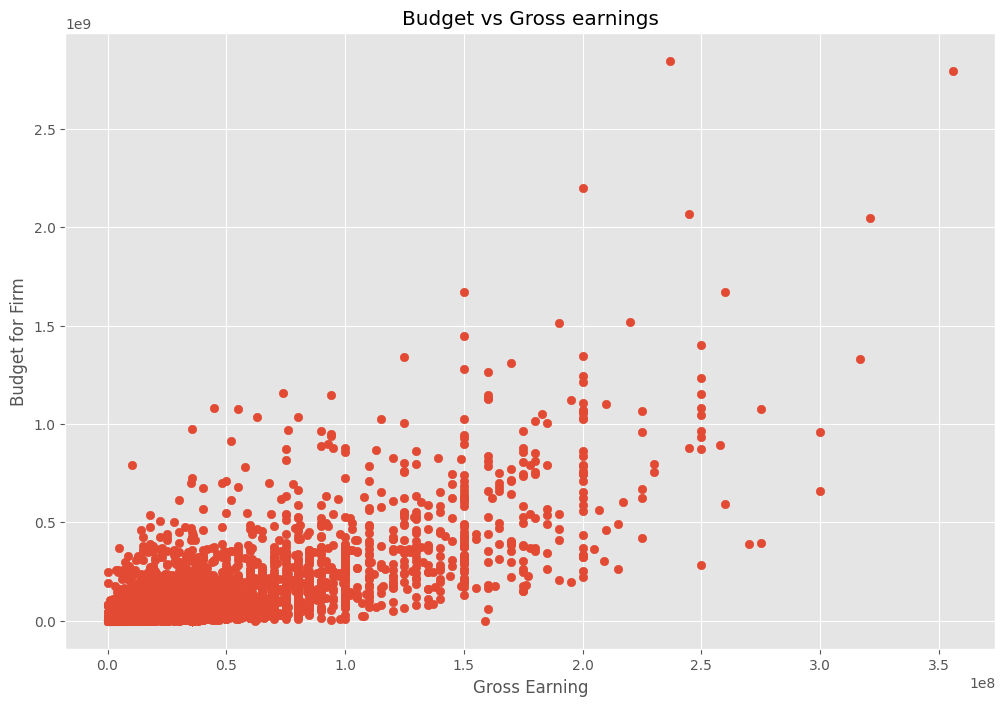

In [96]:
#scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross earnings')
plt.xlabel('Gross Earning')
plt.ylabel ('Budget for Firm')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

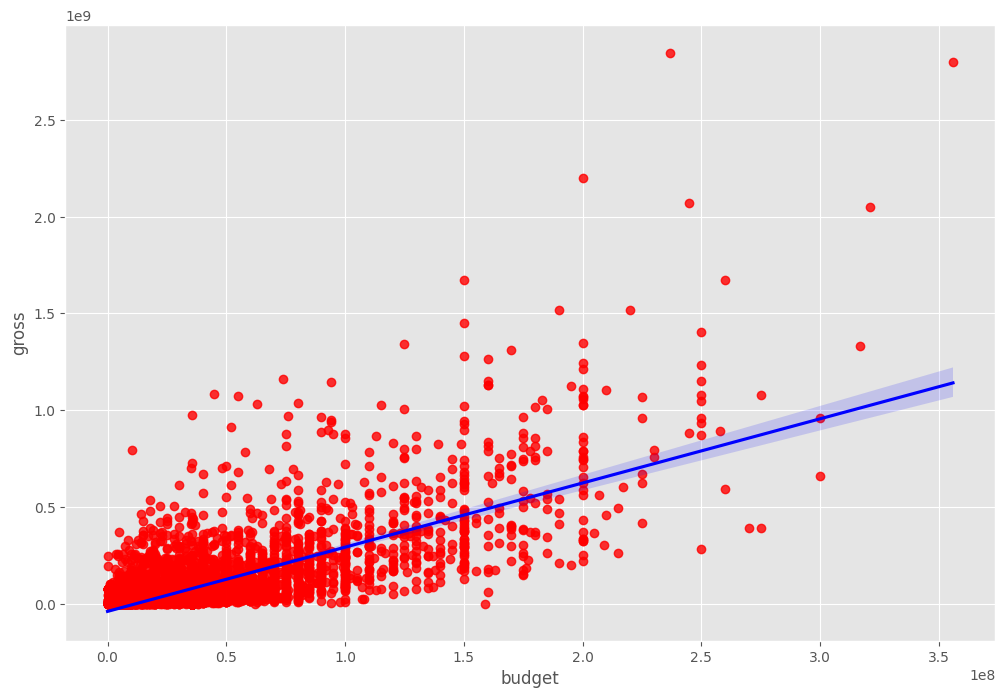

In [97]:
#plot budget vs gross using seaborn


sns.regplot(x='budget', y='gross', data=df, scatter_kws ={"color":"red"}, line_kws ={"color": "blue"})






In [98]:
#looking at correlation
numeric_df = df.select_dtypes(include=[np.number]) #only numeric 
correlation_matrix = numeric_df.corr(method='pearson') #pearson, kendall, spearman
print(correlation_matrix)


            score     votes    budget     gross   runtime
score    1.000000  0.393355  0.059254  0.174156  0.382867
votes    0.393355  1.000000  0.421007  0.628713  0.309166
budget   0.059254  0.421007  1.000000  0.711270  0.265287
gross    0.174156  0.628713  0.711270  1.000000  0.241335
runtime  0.382867  0.309166  0.265287  0.241335  1.000000


***High correlation between budget and gross.***

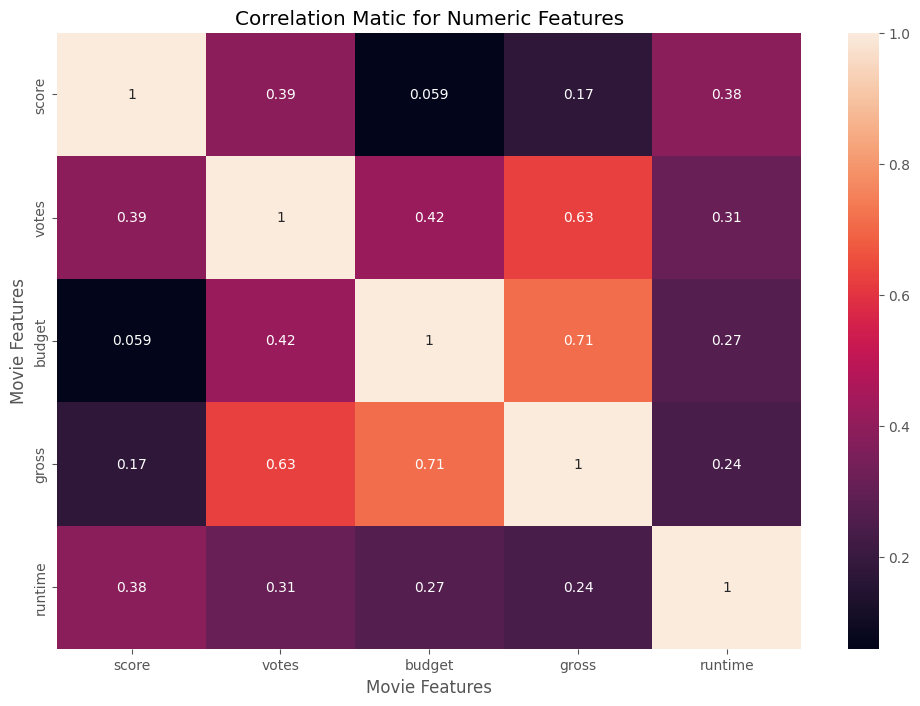

In [99]:
correlation_matrix = numeric_df.corr()
sns.heatmap(
    correlation_matrix,     # Correlation matrix as data
    annot=True,             # Annotate each cell with its value
)
plt.title('Correlation Matic for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [100]:
#convert object columns to categorical codes

df_num = df.copy() #create a copy to preserve original data

for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category') 
        df_num[col_name] = df_num[col_name].cat.codes  #convert categories to numerical codes

df_num.sample(10)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year_released
7139,2835,6,10,6,87000,2826,4331,1268,55,5000000,19735344,193,91.0,2017-06-09,37
613,869,5,6,3,446,1762,1101,1649,55,35589876,1689501,1720,93.0,1984-09-28,4
7526,6116,6,3,5,7400,2849,4372,1065,55,8000000,1561698,1649,100.0,2019-03-08,39
6125,2598,5,6,5,74000,1813,993,1185,55,10000000,44287131,1950,101.0,2012-09-21,32
5635,969,6,6,7,39000,2159,3339,2106,47,18000000,37472736,2282,127.0,2010-01-15,30
3073,1392,6,6,7,218000,2854,222,2000,6,35589876,565727,786,90.0,1998-07-11,18
6927,113,6,6,6,90000,996,2358,540,55,40000000,26620002,1715,146.0,2017-02-17,37
4571,953,6,4,6,109000,220,1625,2196,54,40000000,265126918,2281,108.0,2004-11-19,24
3524,5388,5,4,5,20000,1616,2471,980,55,13000000,8951935,1657,96.0,1999-08-20,19
6634,2449,6,5,6,7100,232,303,175,14,35589876,84417,1312,97.0,2015-05-29,35


In [101]:
df.sample(5) #compare it with df_num

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year_released
592,Broadway Danny Rose,PG,Comedy,7,24000,Woody Allen,Woody Allen,Woody Allen,United States,8000000,10600497,Orion Pictures,84.0,1984-01-27,1984
1542,Blind Fury,R,Action,6,16000,Phillip Noyce,Ryôzô Kasahara,Rutger Hauer,United States,10000000,2692037,TriStar Pictures,86.0,1990-03-16,1990
2747,The Crossing Guard,R,Drama,6,13000,Sean Penn,Sean Penn,Jack Nicholson,United States,9000000,868979,Miramax,111.0,1995-11-16,1995
5625,Beyond a Reasonable Doubt,PG-13,Crime,5,12000,Peter Hyams,Peter Hyams,Jesse Metcalfe,United States,25000000,4515258,Autonomous Films,106.0,2009-07-10,2009
2297,Hot Shots! Part Deux,PG-13,Action,6,86000,Jim Abrahams,Jim Abrahams,Charlie Sheen,United States,25000000,133752825,Twentieth Century Fox,86.0,1993-05-21,1993


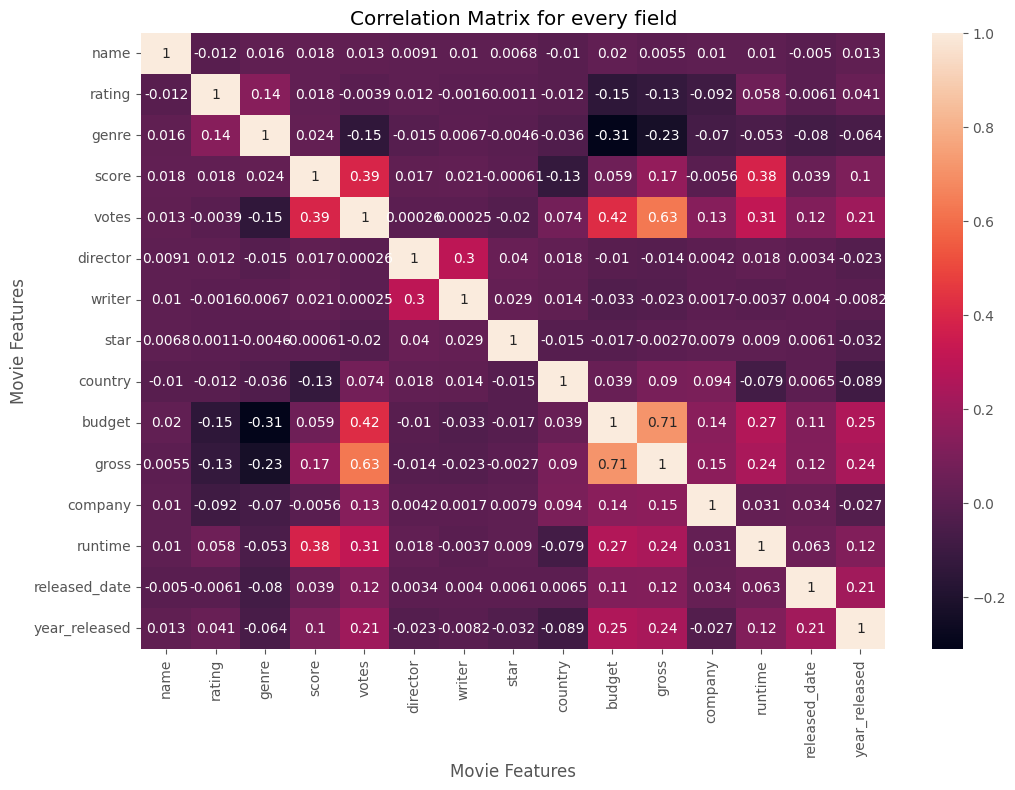

In [102]:
correlation_matrixx = df_num.corr(method='pearson')

sns.heatmap(correlation_matrixx, annot=True)

plt.title('Correlation Matrix for every field')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [103]:
df_num.corr()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year_released
name,1.000000,-0.012206,0.016355,0.017825,0.013086,0.009079,0.009985,0.006844,-0.010359,0.020368,0.005466,0.010373,0.010390,-0.004951,0.012835
rating,-0.012206,1.000000,0.136127,0.017714,-0.003862,0.011951,-0.001610,0.001063,-0.011793,-0.150081,-0.127190,-0.092284,0.058132,-0.006126,0.040756
genre,0.016355,0.136127,1.000000,0.023595,-0.145276,-0.015258,0.006747,-0.004641,-0.035783,-0.310566,-0.230267,-0.070032,-0.052699,-0.080051,-0.063573
score,0.017825,0.017714,0.023595,1.000000,0.393355,0.016695,0.021048,-0.000614,-0.127074,0.059254,0.174156,-0.005642,0.382867,0.038530,0.104272
votes,0.013086,-0.003862,-0.145276,0.393355,1.000000,0.000260,0.000252,-0.019510,0.073521,0.421007,0.628713,0.130659,0.309166,0.118985,0.206358
director,0.009079,0.011951,-0.015258,0.016695,0.000260,1.000000,0.299523,0.039875,0.018014,-0.010364,-0.014272,0.004248,0.017624,0.003426,-0.022579
writer,0.009985,-0.001610,0.006747,0.021048,0.000252,0.299523,1.000000,0.028887,0.014490,-0.033223,-0.023192,0.001729,-0.003692,0.004025,-0.008162
star,0.006844,0.001063,-0.004641,-0.000614,-0.019510,0.039875,0.028887,1.000000,-0.015101,-0.017056,-0.002678,0.007918,0.008957,0.006059,-0.031850
country,-0.010359,-0.011793,-0.035783,-0.127074,0.073521,0.018014,0.014490,-0.015101,1.000000,0.038576,0.089829,0.094176,-0.079188,0.006482,-0.088725
budget,0.020368,-0.150081,-0.310566,0.059254,0.421007,-0.010364,-0.033223,-0.017056,0.038576,1.000000,0.711270,0.142856,0.265287,0.114845,0.252811


In [104]:
corr_mat = df_num.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name           name             1.000000
               rating          -0.012206
               genre            0.016355
               score            0.017825
               votes            0.013086
               director         0.009079
               writer           0.009985
               star             0.006844
               country         -0.010359
               budget           0.020368
               gross            0.005466
               company          0.010373
               runtime          0.010390
               released_date   -0.004951
               year_released    0.012835
rating         name            -0.012206
               rating           1.000000
               genre            0.136127
               score            0.017714
               votes           -0.003862
               director         0.011951
               writer          -0.001610
               star             0.001063
               country         -0.011793
               b

In [105]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget         genre           -0.310566
genre          budget          -0.310566
gross          genre           -0.230267
genre          gross           -0.230267
rating         budget          -0.150081
budget         rating          -0.150081
votes          genre           -0.145276
genre          votes           -0.145276
rating         gross           -0.127190
gross          rating          -0.127190
score          country         -0.127074
country        score           -0.127074
company        rating          -0.092284
rating         company         -0.092284
year_released  country         -0.088725
country        year_released   -0.088725
released_date  genre           -0.080051
genre          released_date   -0.080051
runtime        country         -0.079188
country        runtime         -0.079188
genre          company         -0.070032
company        genre           -0.070032
year_released  genre           -0.063573
genre          year_released   -0.063573
runtime        g

In [106]:
high_Corr = sorted_pairs[(sorted_pairs) > 0.5]
high_Corr

gross          votes            0.628713
votes          gross            0.628713
budget         gross            0.711270
gross          budget           0.711270
name           name             1.000000
star           star             1.000000
runtime        runtime          1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
genre          genre            1.000000
rating         rating           1.000000
released_date  released_date    1.000000
year_released  year_released    1.000000
dtype: float64

***Votes and budget have the highest correlation to gross earnings of a movie.
whereas, Genre and rating has low correlation***

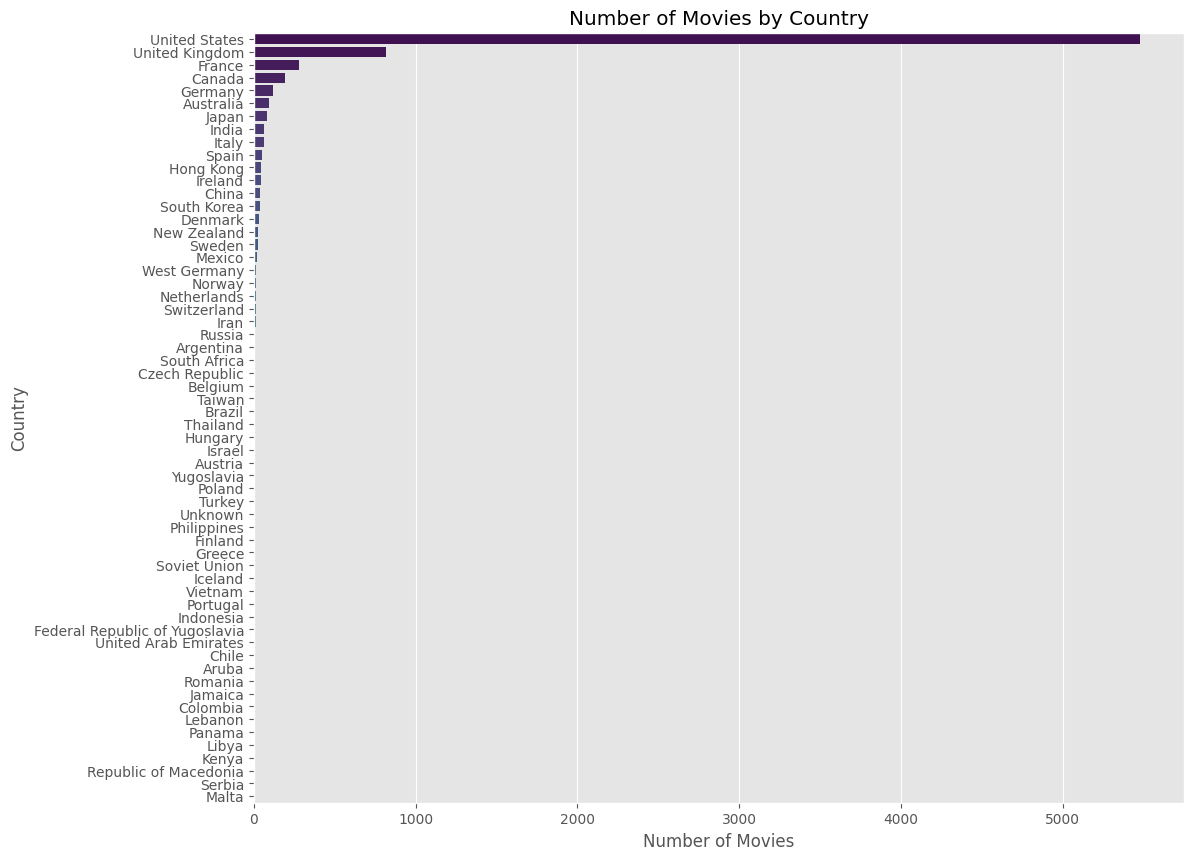

In [107]:
#Visualise the number of movies by country

plt.figure(figsize=(12, 10))

# Generate a horizontal bar plot directly using the value_counts
sns.barplot(
    y= df['country'].value_counts().index,  #provides the countries sorted by count
    x= df['country'].value_counts().values, #provides the corresponding counts for each country
    palette='viridis'
)

# Add labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Number of Movies by Country')

plt.show()


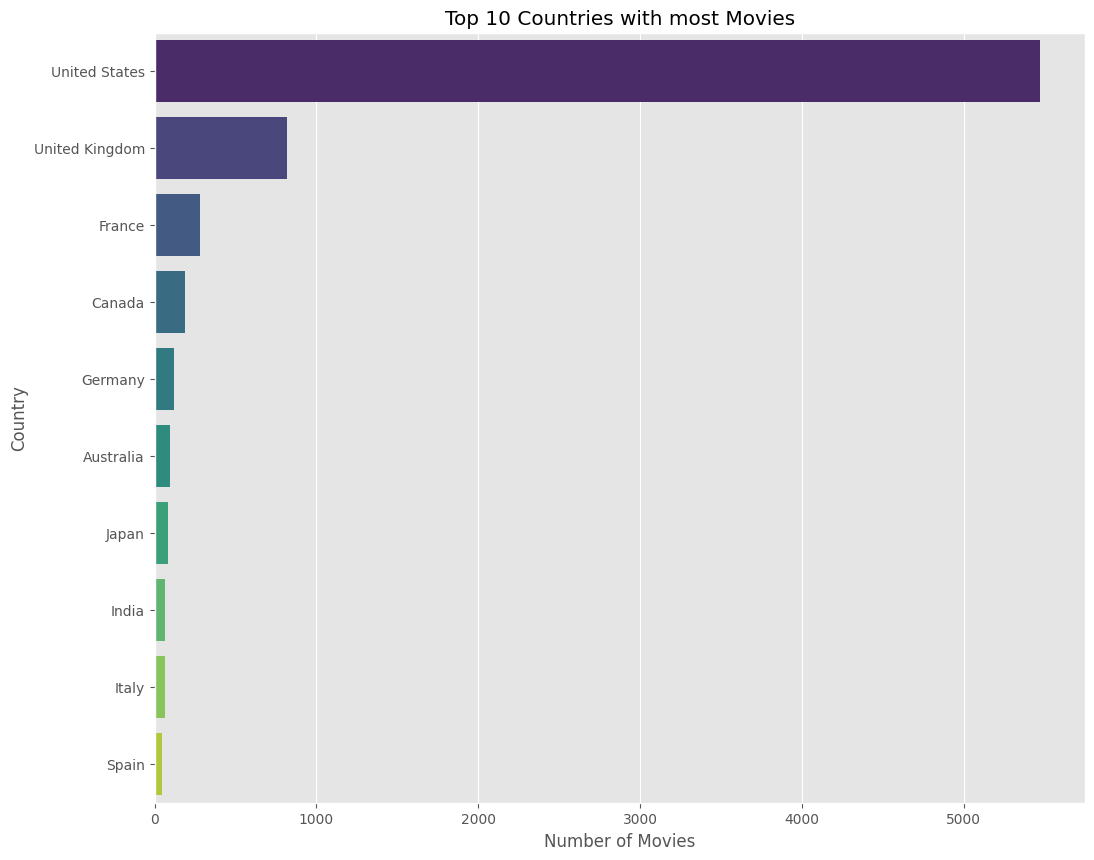

In [108]:
#Display only top 10 

plt.figure(figsize=(12, 10))

country_counts = df['country'].value_counts()

# Print the top 20 countries with the most movies
top_10_countries = country_counts.head(10)

# Create a horizontal bar plot for the top 20 countries
sns.barplot(
    y=top_10_countries.index,    # Countries as y-axis (categories)
    x=top_10_countries.values,   # Counts as x-axis (numeric values)
    palette='viridis'            # Color palette
)

# Add labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 10 Countries with most Movies')

plt.show()


In [109]:
#Count number of movies in each Genre

num_movies_genre = df['genre'].value_counts()
num_movies_genre

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
History         1
Sport           1
Music           1
Name: count, dtype: int64

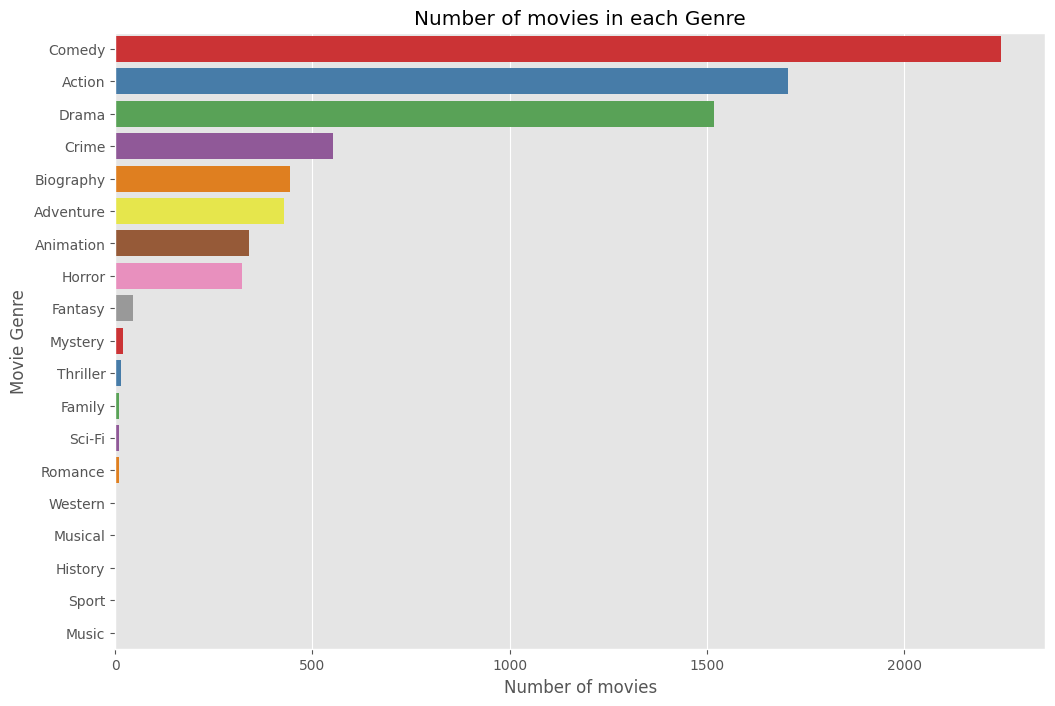

In [110]:
#Visualise number of movies in each Genre

num_movies_genre = df['genre'].value_counts()
sns.barplot(y=num_movies_genre.index, 
            x= num_movies_genre.values, 
            palette='Set1')
plt.title('Number of movies in each Genre')
plt.xlabel('Number of movies')
plt.ylabel('Movie Genre')
plt.show()

***Comedy genre has the highest numbers of movies whereas Music has the lowest.***

In [111]:
average_gross = df['gross']

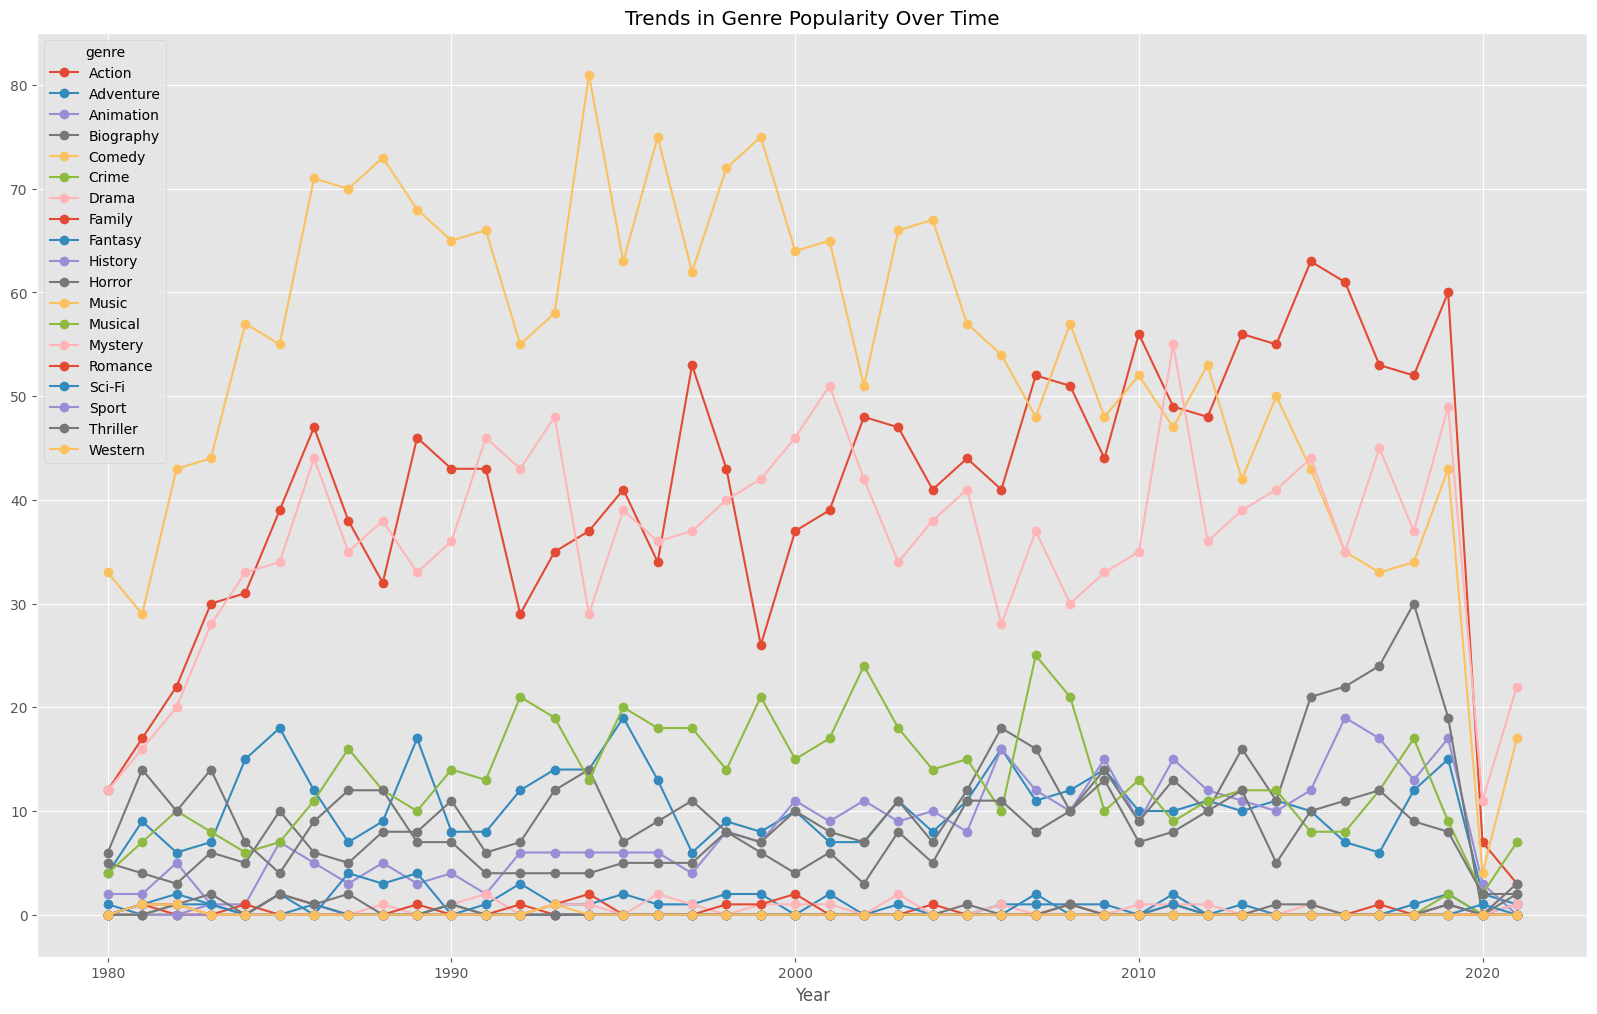

In [112]:
#Analyse trends in genre popularity over time

genre_trends = df.groupby(['year_released', 'genre']).size().unstack(fill_value=0)

genre_trends.plot(kind='line', figsize=(20, 12), marker='o')
plt.title('Trends in Genre Popularity Over Time')
plt.xlabel('Year')
plt.show()
